In [7]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\USER\AppData\Local\Temp\ipykernel_26848\3268192623.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_freq, audio_signal = wavfile.read('humpback_whales.wav')


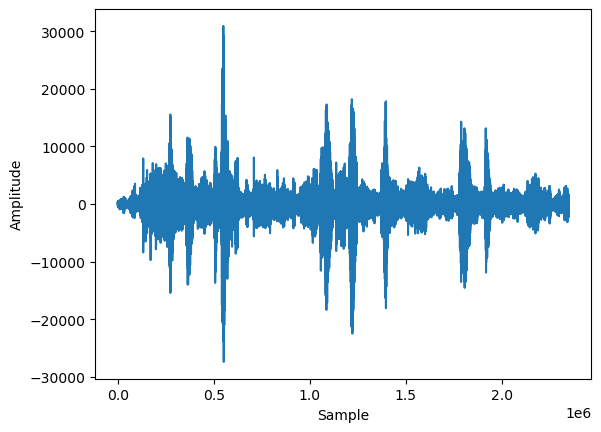

In [8]:
# Load and visualize the audio
sampling_freq, audio_signal = wavfile.read('humpback_whales.wav')

# Convert the audio signal to mono if it is stereo
if audio_signal.ndim>1:
    audio_signal = np.mean(audio_signal, axis=1)

plt.plot(audio_signal)
plt.xlabel(r'Sample')
plt.ylabel(r'Amplitude')
plt.show()

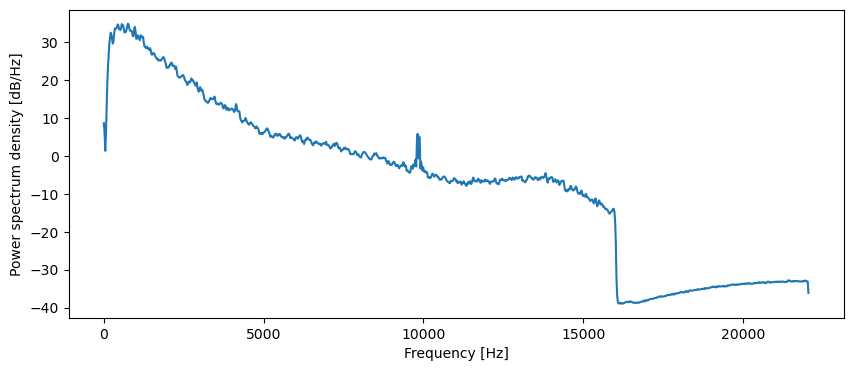

Noise frequencies: [ 172.265625    193.79882812  215.33203125  236.86523438  258.3984375
  279.93164062  301.46484375  322.99804688  344.53125     366.06445312
  387.59765625  409.13085938  430.6640625   452.19726562  473.73046875
  495.26367188  516.796875    538.33007812  559.86328125  581.39648438
  602.9296875   624.46289062  645.99609375  667.52929688  689.0625
  710.59570312  732.12890625  753.66210938  775.1953125   796.72851562
  818.26171875  839.79492188  861.328125    882.86132812  904.39453125
  925.92773438  947.4609375   968.99414062  990.52734375 1012.06054688
 1033.59375    1055.12695312 1076.66015625 1098.19335938 1119.7265625
 1141.25976562 1162.79296875 1184.32617188 1205.859375   1227.39257812
 1248.92578125 1270.45898438 1291.9921875  1313.52539062 1335.05859375
 1356.59179688 1378.125      1399.65820312 1421.19140625 1442.72460938
 1464.2578125 ]


In [9]:
# Power spectrum density
NFFT = 2048
noverlap = NFFT//2

f, psd = signal.welch(audio_signal, fs=sampling_freq, nperseg=NFFT, noverlap=noverlap)

plt.figure(figsize=(10,4))
plt.plot(f, 10*np.log10(psd))
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Power spectrum density [dB/Hz]')
plt.show()

# Identify noise frequencies
threshold = np.mean(psd)+np.std(psd)
noise_freqs = f[psd>threshold]
print('Noise frequencies:', noise_freqs)

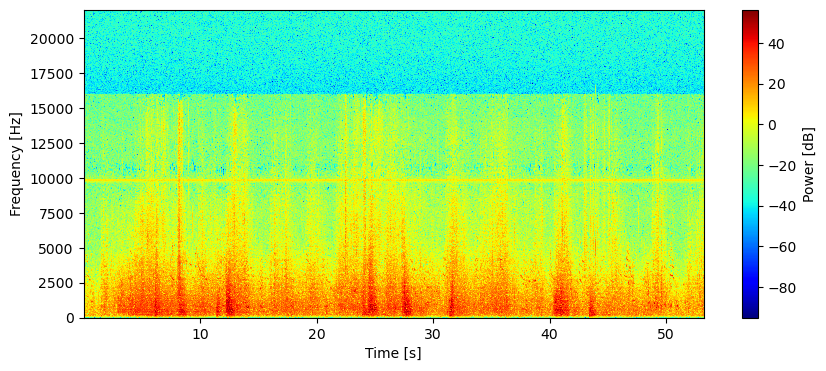

In [10]:
# Spectrogram
window_size = 2048
hop_size = 512

frequencies, times, spectrogram = signal.spectrogram(audio_signal, fs=sampling_freq, window='hann', nperseg=window_size, noverlap=hop_size, detrend=False)
spectrogram_db = 10*np.log10(spectrogram)

plt.figure(figsize=(10,4))
plt.pcolormesh(times, frequencies, spectrogram_db, cmap='jet')
plt.xlabel(r'Time [s]')
plt.ylabel(r'Frequency [Hz]')
plt.colorbar(label=r'Power [dB]')

plt.show()

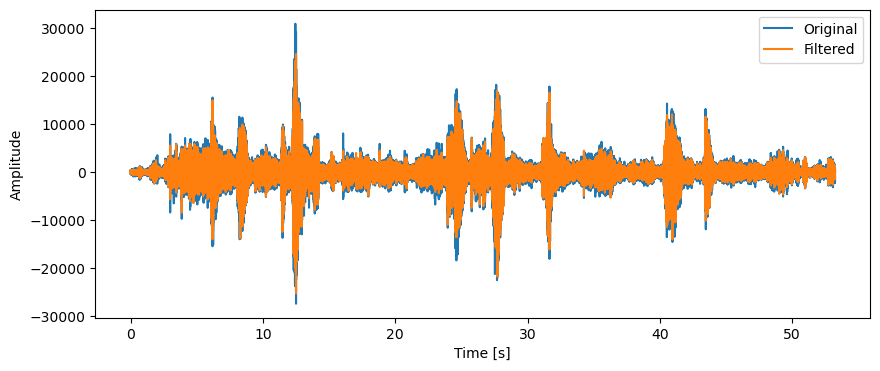

In [11]:
# Filtering
low_freq = 172 # Hz
high_freq = 1465 # Hz
filter_order = 4

nyquist_freq = 0.5*sampling_freq
low = low_freq/nyquist_freq
high = high_freq/nyquist_freq
b, a = signal.butter(filter_order, [low, high], btype='band')

audio_signal_filtered = signal.filtfilt(b, a, audio_signal)

plt.figure(figsize=(10,4))
plt.plot(np.arange(len(audio_signal))/sampling_freq, audio_signal, label=r'Original')
plt.plot(np.arange(len(audio_signal_filtered))/sampling_freq, audio_signal_filtered, label=r'Filtered')
plt.xlabel(r'Time [s]')
plt.ylabel(r'Amplitude')
plt.legend()

plt.show()

wavfile.write('humpback_whales_filtered.wav', sampling_freq, np.asarray(audio_signal_filtered, dtype=np.int16))